In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

/home/anson/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# CUTS:
# |eta(l)| <= 2.5
# pT(l) >= 200
# pT(j1), pT(j2) >= 50

In [3]:
cm = 14
mN1 = 2
s_file = uproot.open(f'../features/signal_reco_{cm}TeV_{mN1}TeV.root')


In [4]:
df_s = pd.DataFrame(np.array(s_file['t']['features'].array()))


In [5]:
def plot_reco_truth(df, particle, cm=1, mN1=1):
    plt.figure(figsize=(18, 4))

    range_ = [df['pt'+particle+'True'].quantile(0.0) ,df['pt'+particle+'True'].quantile(0.995)]
#     range_ = None
    ax1 = plt.subplot(131)
    ax1.hist(df['pt'+particle], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax1.hist(df['pt'+particle+'True'], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['pt'+particle] - df_s['pt'+particle+'True']).std(),2)
    ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{N1}=$'+str(mN1)+'TeV:\n'+
                  r'$p_T$ of '+particle+'\nError: '+str(er))
    

    range_ = [-5,5]
    range_ = None
#     range_ = [df['pt'+particle+'True'].quantile(0.0) ,df['pt'+particle+'True'].quantile(0.999)]
    ax2 = plt.subplot(132)
    ax2.hist(df['eta'+particle], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax2.hist(df['eta'+particle+'True'], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['eta'+particle] - df_s['eta'+particle+'True']).std(),2)
    ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{N1}=$'+str(mN1)+'TeV:\n'+
                  r'$\eta$ of '+particle+'\nError: '+str(er))

    range_ = [-6,6]
    range_ = None
    ax3 = plt.subplot(133)
    ax3.hist(df['phi'+particle], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax3.hist(df['phi'+particle+'True'], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['phi'+particle] - df_s['phi'+particle+'True']).std(),2)
    ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{N1}=$'+str(mN1)+'TeV:\n'+
                  r'$\phi$ of '+particle+'\nError: '+str(er))

    ax1.legend()

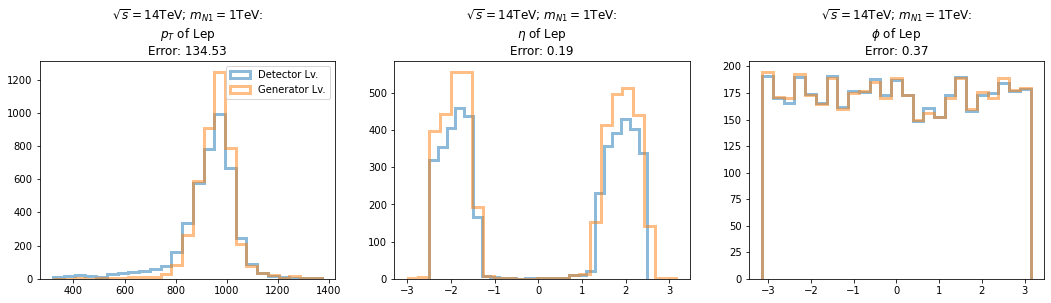

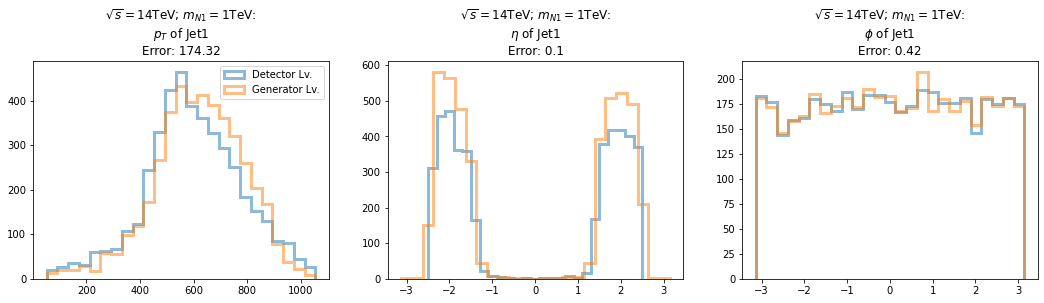

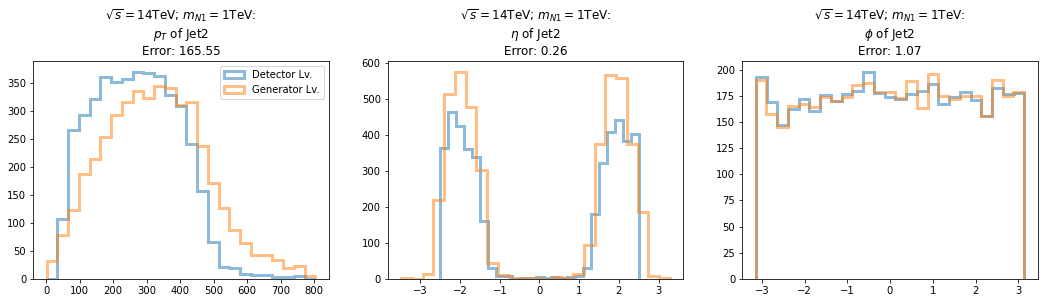

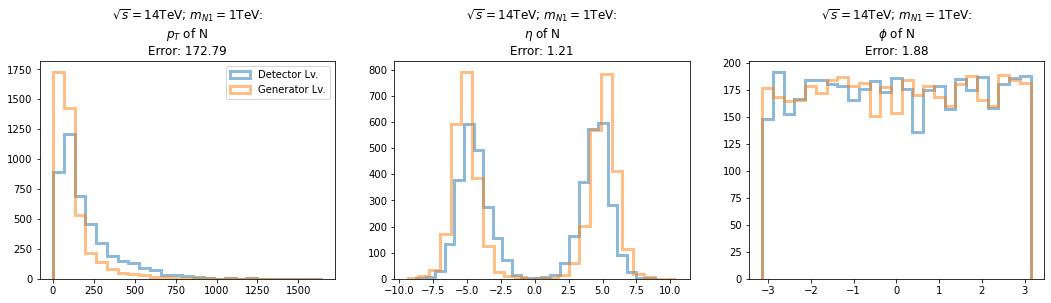

In [6]:
plot_reco_truth(df_s, 'Lep', cm)
plot_reco_truth(df_s, 'Jet1', cm)
plot_reco_truth(df_s, 'Jet2', cm)
plot_reco_truth(df_s, 'N', cm)

From: 1900.0 to 2100.0 TeV
Contains 2545/4355 = 58.44% of the reconstructed events
Contains 2545/10000 = 25.45% of total simulations 


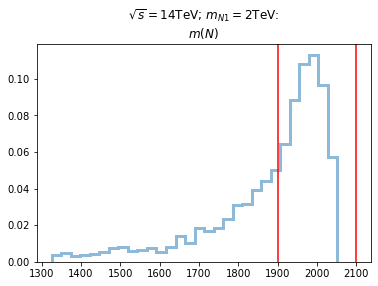

In [7]:
width_ = 0.6
width_num = 0.05
lower_b, upper_b = mN1*(1-width_num)*1000, mN1*(1+width_num)*1000

sim_num=10000

# range_ = [mN1*(1-width_)*1000, mN1*(1+width_)*1000]
range_ = [df_s['mN'].quantile(0.05), df_s['mN'].quantile(0.95)]
# range_ = None
bins_ = 30

plt.hist(df_s['mN'], weights=[1/len(df_s)]*len(df_s), bins=bins_, range=range_, histtype='step', alpha=0.5, lw=3);
# plt.hist(df_b['mN'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
plt.title(r'$\sqrt{s}=$'+str(cm)+'TeV; '+'$m_{N1}=$'+str(mN1)+'TeV:\n'+
          r'$m(N)$');

plt.axvline(lower_b, color='red')
plt.axvline(upper_b, color='red')

print("From: {} to {} TeV".format(lower_b, upper_b))
print("Contains {}/{} = {:.2f}% of the reconstructed events".format(len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)]), len(df_s), 100*len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)])/len(df_s)))
print("Contains {}/{} = {:.2f}% of total simulations ".format(len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)]), sim_num, 100*len(df_s[(df_s['mN'] >= lower_b) & (df_s['mN'] <= upper_b)])/sim_num, sim_num))

